In [15]:
from l5pc.utils.common_utils import (
    load_prior,
    extract_bounds,
    load_posterior,
)
from l5pc.utils.simulation_utils import (
    assemble_prior,
    assemble_simulator,
    assemble_db,
    write_to_dj,
)
import torch
from sbi.analysis import pairplot
from omegaconf import DictConfig
import matplotlib as mpl
from l5pc.model.utils import return_gt, return_names, return_xo
import matplotlib.pyplot as plt

In [16]:
inference, posterior, used_features, round_ = load_posterior("l20_7", "2022_05_08__08_59_11_snpe")

In [17]:
prior = assemble_prior(DictConfig({"model": {"name": "l5pc", "num_params": 20, "prior": [[]]}}))
prior_bounds = extract_bounds(prior).T.numpy()

In [18]:
names = [r"$\theta_1$", r"$\theta_2$", r"$\theta_3$", r"$\theta_4$", r"$\theta_5$", r"$\theta_6$", r"$\theta_7$", r"$\theta_8$", r"$\theta_9$", r"$\theta_{10}$", r"$\theta_{11}$", r"$\theta_{12}$", r"$\theta_{13}$", r"$\theta_{14}$", r"$\theta_{15}$", r"$\theta_{16}$", r"$\theta_{17}$", r"$\theta_{18}$", r"$\theta_{19}$", r"$\theta_{20}$"]


In [19]:
all_labels = []
for dim_i in range(20):
    labels = [prior_bounds[dim_i, num_tmp] for num_tmp in range(2)]
    new_labels = []
    counter = 0
    for l in labels:
        if counter == 0:
            new_labels.append(r'$\mathdefault{'+str(l)+'}\;\;\;$        ')
        else:
            new_labels.append(r'$\mathdefault{'+str(l)+'}\;\;\;$    ')
        counter+=1
    all_labels.append(new_labels)

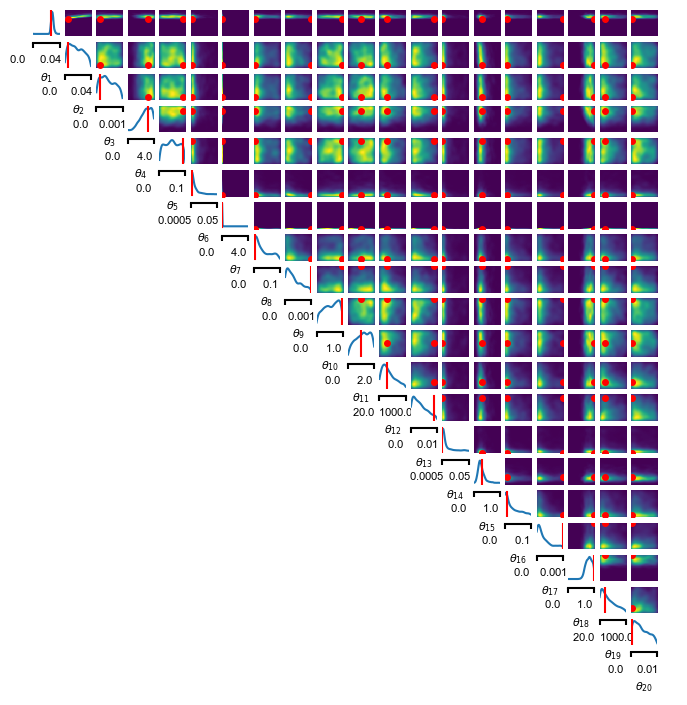

In [23]:
posterior_samples = posterior.sample((1000,), show_progress_bars=False)
with mpl.rc_context(fname="../../.matplotlibrc"):
    _ = pairplot(
        posterior_samples,
        limits=prior_bounds,
        upper=["kde"],
        diag=["kde"],
        ticks=prior_bounds,
        tick_labels=all_labels,
        figsize=(8.05, 8.05),
        labels=names,
        points=return_gt(as_pd=False),
        points_colors="r",
        points_offdiag={"markersize": 8},
    )
    plt.savefig("../svg/panel_appendix_a.svg")

In [24]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [25]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

f = Figure("15.7cm", "17.0cm",

    Panel(
          SVG("../svg/panel_appendix_a.svg").scale(svg_scale).move(0, 0),
    ).move(0, 0),
)

f.save("../fig/fig5_appendix1.svg")
svg('../fig/fig5_appendix1.svg')